In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.integrate as inta
import pandas as pd
import random as ran
import sys

In [2]:
inta.quad(lambda x: x**2,0,1)

(0.33333333333333337, 3.700743415417189e-15)

## * Finding $R_{max}$

[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019] 18 [2.98765707e+03 2.19927579e+03 1.19163620e+03 4.75178142e+02
 1.39419099e+02 3.00898462e+01 4.77537753e+00 5.57093547e-01
 4.77544051e-02 3.00670125e-03 1.38990136e-04 4.71543972e-06
 1.17364776e-07 2.14225382e-09 2.86662394e-11 2.81122772e-13
 2.01983515e-15 1.06294259e-17]


Text(0.5, 1.0, 'Total charge between radii')

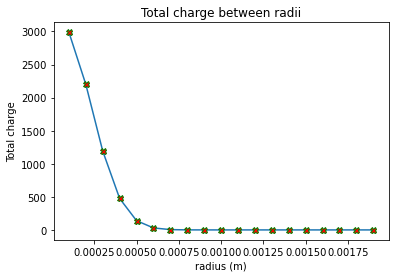

In [3]:
Nq = 200 #gain is 200 MeV
R = 10e+6 # Surface resistivity (ohm/square)
d = 100e-6 # Anode-readout plane separation (m)
eps_0 = 8.854e-12 # Permittivity of a vacuum (F/m)
k_1 = 3.3 # Relative permittivity of dielectric material (glue)
k_2 = 3.1 # Relative permittivity of dielectric material (mylar)
C = ((2*eps_0)/d)*((k_1*k_2)/(k_1+k_2)) # Capacitance per unit area with two dielectrics
h = 1/(R*C)
q = np.array([])
r = np.array([])
r = np.append(r,0)
#q = np.append(q,0)
t = 45e-9 #45 nano seconds 
e = 1.60217662e-19 #charge of an electron in coulombs
i = 0 #to keep track of index
found = False 
while found == False:
    r = np.append(r,r[i]+1e-4)
    charge = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),r[i],r[i+1])
    if charge[0] <= e:
        print(r,i,q)
        found = True
        
    q = np.append(q,charge[0])

    i += 1
r = np.delete(r,0)   
plt.plot(r,q,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets focus on the parts where Total charge is less than 1

Text(0.5, 1.0, 'Total charge between radii')

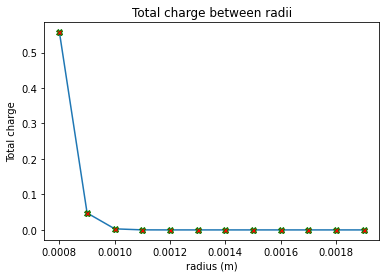

In [4]:

plt.plot(r[np.where(q<1)],q[np.where(q<1)],marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets make a Data frame to show the values.

In [5]:

ChangeR = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeR["Radius (m)"] = pd.Series(r)
ChangeR["Total charge (C)"] = pd.Series(q)

ChangeR


,Radius (m),Total charge (C)
0,0.0001,2.987657e+03
1,0.0002,2.199276e+03
2,0.0003,1.191636e+03
3,0.0004,4.751781e+02
4,0.0005,1.394191e+02
5,0.0006,3.008985e+01
6,0.0007,4.775378e+00
7,0.0008,5.570935e-01
8,0.0009,4.775441e-02
9,0.0010,3.006701e-03


### Changing Area

[0.         0.0001     0.00014142 0.00017321 0.0002     0.00022361
 0.00024495 0.00026458 0.00028284 0.0003     0.00031623 0.00033166
 0.00034641 0.00036056 0.00037417 0.0003873  0.0004     0.00041231
 0.00042426 0.00043589 0.00044721 0.00045826 0.00046904 0.00047958
 0.0004899  0.0005     0.0005099  0.00051962 0.00052915 0.00053852
 0.00054772 0.00055678 0.00056569 0.00057446 0.0005831  0.00059161
 0.0006     0.00060828 0.00061644 0.0006245  0.00063246 0.00064031
 0.00064807 0.00065574 0.00066332 0.00067082 0.00067823 0.00068557
 0.00069282 0.0007     0.00070711 0.00071414 0.00072111 0.00072801
 0.00073485 0.00074162 0.00074833 0.00075498 0.00076158 0.00076811
 0.0007746  0.00078102 0.0007874  0.00079373 0.0008     0.00080623
 0.0008124  0.00081854 0.00082462 0.00083066 0.00083666 0.00084261
 0.00084853 0.0008544  0.00086023 0.00086603 0.00087178 0.0008775
 0.00088318 0.00088882 0.00089443 0.0009     0.00090554 0.00091104
 0.00091652 0.00092195 0.00092736 0.00093274 0.00093808 0.00094

Text(0.5, 1.0, 'Total charge between radii')

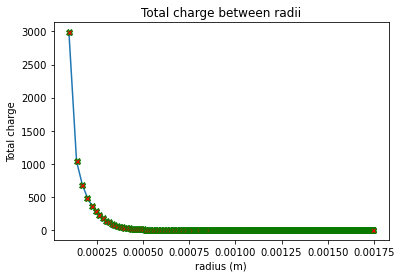

In [62]:
#our final radius should be 0.0019 as that is close to where the charge is essencially of that of an electron
R = 0.0019 #m
Segments = 361 # number of segments with equal area pi*0.0001^2  
Ar=np.array([])
for ith in np.arange(0,Segments,1):
    newr = R*np.sqrt(ith/Segments)
    Ar = np.append(Ar,newr)
Aq = np.array([])

j=0 #index
foundA = False 
while foundA == False:
    
    chargeA = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),Ar[j],Ar[j+1])
    if chargeA[0] <= e:
        print(Ar,j,Aq)
        foundA = True
    Aq = np.append(Aq,chargeA[0])

    j += 1
 

    
newAr =np.array([]) #Keeping radii that have total charge > e

for b in np.arange(0,len(Aq)+1,1):
    newAr = np.append(newAr,Ar[b])
newAr = np.delete(newAr,0) 
plt.plot(newAr,Aq,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")



### Lets focus on Total charge less that 0.1

Text(0.5, 1.0, 'Total charge between radii')

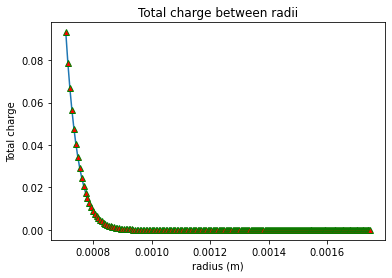

In [63]:
plt.plot(newAr[np.where(Aq < 0.1)],Aq[np.where(Aq < 0.1)],marker= "^",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")


### Make a dataframe.

In [69]:
ChangeA = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeA["Radius (m)"] = pd.Series(newAr)
ChangeA["Total charge (C)"] = pd.Series(Aq)
ChangeA.to_csv("Work")

### Showing graphs using diffrent sufrace resistivty for diagnosis.

[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019
 0.002  0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029
 0.003  0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039
 0.004  0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049
 0.005  0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057] 56 [3.12860687e+02 3.03199254e+02 2.84762235e+02 2.59187338e+02
 2.28624244e+02 1.95437493e+02 1.61908841e+02 1.29990108e+02
 1.01140962e+02 7.62642258e+01 5.57303314e+01 3.94674735e+01
 2.70871885e+01 1.80162912e+01 1.16129798e+01 7.25435354e+00
 4.39167787e+00 2.57655190e+00 1.46495375e+00 8.07208028e-01
 4.31045885e-01 2.23068342e-01 1.11873882e-01 5.43745575e-02
 2.56117317e-02 1.16911774e-02 5.17194114e-03 2.21730188e-03
 9.21238150e-04 3.70932383e-04 1.44741555e-04 5.47352705e-05
 2.00593452e-05 7.12428987e-06 2.45211959e-06 8.17931326e-07
 2.64403410e-07 8.28308583e-08 2.51

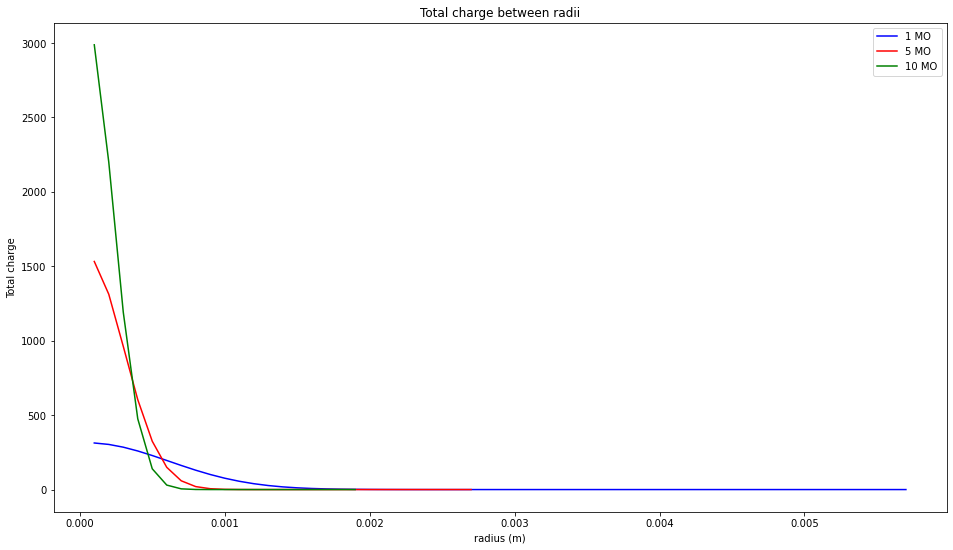

In [9]:
h1 = 1/(1e+6*C)#surface resistivty of 1 megaohms
h2 = 1/(5e+6*C)#surface resistivty of 5 megaohms
h3 = 1/(10e+6*C)#surface resistivty of 10 megaohms
#R=1 mega ohms
q1 = np.array([])
r1 = np.array([])
r1 = np.append(r1,0)
#q = np.append(q,0)
t = 45e-9 #45 nano seconds 
e = 1.60217662e-19 #charge of an electron in coulombs
i1 = 0 #to keep track of index
found1 = False 
while found1 == False:
    r1 = np.append(r1,r1[i1]+1e-4)
    charge1 = inta.quad(lambda x: 1/(2*t*h1)*np.exp(-x**2/(4*t*h1)),r1[i1],r1[i1+1])
    if charge1[0] <= e:
        print(r1,i1,q1)
        found1 = True
        
    q1 = np.append(q1,charge1[0])

    i1 += 1
r1 = np.delete(r1,0)   
#R = 5 MegaOhms
q2 = np.array([])
r2 = np.array([])
r2 = np.append(r2,0)
#q = np.append(q,0)
i2 = 0 #to keep track of index
found2 = False 
while found2 == False:
    r2 = np.append(r2,r2[i2]+1e-4)
    charge2 = inta.quad(lambda x: 1/(2*t*h2)*np.exp(-x**2/(4*t*h2)),r2[i2],r2[i2+1])
    if charge2[0] <= e:
        print(r2,i2,q2)
        found2 = True
        
    q2 = np.append(q2,charge2[0])

    i2 += 1
r2 = np.delete(r2,0)

#R = 10 MegaOhms
q3 = np.array([])
r3 = np.array([])
r3 = np.append(r3,0)
#q = np.append(q,0)
i3 = 0 #to keep track of index
found3 = False 
while found3 == False:
    r3 = np.append(r3,r3[i3]+1e-4)
    charge3 = inta.quad(lambda x: 1/(2*t*h3)*np.exp(-x**2/(4*t*h3)),r3[i3],r3[i3+1])
    if charge3[0] <= e:
        print(r3,i3,q3)
        found3 = True
        
    q3 = np.append(q3,charge3[0])

    i3 += 1
r3 = np.delete(r3,0)

plt.figure(figsize=(16,9))
plt.plot(r1,q1,color="blue",label="1 MO")
plt.plot(r2,q2,color="r",label="5 MO")
plt.plot(r3,q3,color="g",label="10 MO")
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")
plt.legend()



## Making circles

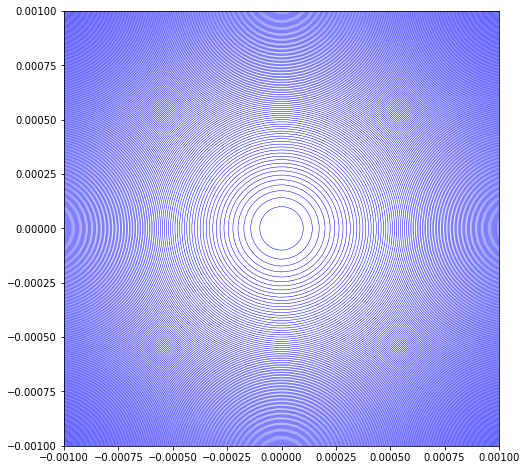

In [65]:

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")


for i in range(0,len(newAr)):
    c = plt.Circle((0,0), newAr[i],fill = 0,lw = 0.5,color= "blue")
    ax.add_artist(c)

plt.xlim([-0.001,0.001])
plt.ylim([-0.001,0.001])

  
plt.show()


## plotting points


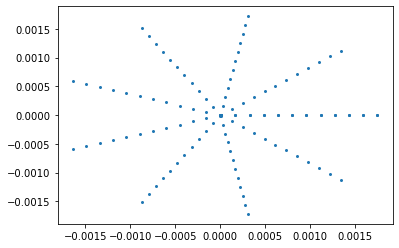

In [11]:
points = 120
rmax = 0.001745
ppa = 10 #number of points per annulie
valuesr = np.linspace(0.00001,rmax,int(points/ppa))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x = np.array([])
y = np.array([])
for r in valuesr:
    for theta in pirange:
        x=np.append(x,r*np.cos(theta))
        y=np.append(y,r*np.sin(theta))
plt.scatter(x,y,marker=".",lw=0.01)


In [12]:
rad= ChangeA.iloc[:,0]
Totcharge = ChangeA.iloc[:,1]
count = 0
cpp = np.array([0,]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in valuesr:
        if cur > rad[i-1] and cur< rad[i]:
            count += ppa
    if count > 0:
        cpp = np.append(cpp,Totcharge[i]/count)
    else:
        cpp = np.append(cpp,0)


In [13]:
ChangeA["Charge per Point"] = pd.Series(cpp)
ChangeA

,Radius (m),Total charge (C),Charge per Point
0,0.000052,1.612556e+03,0.000000e+00
1,0.000074,6.363849e+02,0.000000e+00
2,0.000090,4.677522e+02,0.000000e+00
3,0.000104,3.778386e+02,0.000000e+00
4,0.000116,3.189879e+02,0.000000e+00
...,...,...,...
1089,0.001717,1.878991e-19,1.878991e-21
1090,0.001718,1.799941e-19,1.799941e-21
1091,0.001718,1.724217e-19,1.724217e-21
1092,0.001719,1.651680e-19,1.651680e-21


In [14]:
ChangeA.describe()

,Radius (m),Total charge (C),Charge per Point
count,1094.000000,1.094000e+03,1.094000e+03
mean,0.001147,6.424716e+00,2.062125e-01
std,0.000405,5.947068e+01,1.285516e+00
min,0.000052,1.582194e-19,0.000000e+00
25%,0.000861,2.032155e-14,1.466932e-16
50%,0.001217,2.767878e-09,2.561191e-11
75%,0.001490,4.351373e-04,5.587176e-06
max,0.001720,1.612556e+03,1.615600e+01


Text(0.5, 0, 'Radius')

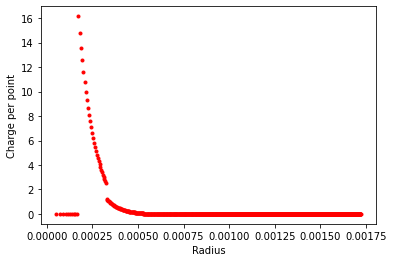

In [15]:
plt.plot(ChangeA.loc[:,"Radius (m)"],ChangeA.loc[:,"Charge per Point"],".r")
plt.ylabel("Charge per point")
plt.xlabel("Radius")


(0.0, 30.0)

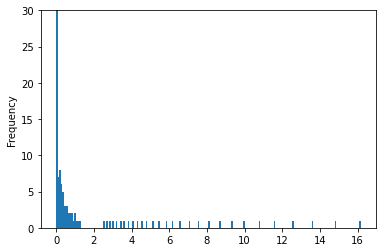

In [16]:
Charging = ChangeA.loc[:,"Charge per Point"]
Charging[Charging != 0].plot.hist(bins=200)

plt.ylim(0,30)

### playing around with randomness

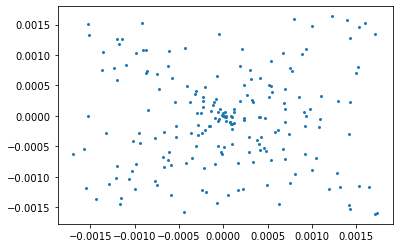

In [17]:
points = 200
rmax = 0.001745
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))

plt.scatter(xtest,ytest,marker=".",lw=0.01)


In [18]:
rad= np.array([0,])
rad= np.append(rad,ChangeA.iloc[:,0])
Totcharge = ChangeA.iloc[:,1]
count = 0
cpptest = np.array([]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in rrange:
        if cur > rad[i-1] and cur< rad[i]:
            count += 1
    if count > 0:
        cpptest = np.append(cpptest,Totcharge[i-1]/count)
    else:
        cpptest = np.append(cpptest,0)


In [19]:
changeAtest =ChangeA
changeAtest["Charge per Point"] = cpptest
changeAtest


,Radius (m),Total charge (C),Charge per Point
0,0.000052,1.612556e+03,8.062778e+02
1,0.000074,6.363849e+02,2.121283e+02
2,0.000090,4.677522e+02,9.355045e+01
3,0.000104,3.778386e+02,7.556772e+01
4,0.000116,3.189879e+02,5.316465e+01
...,...,...,...
1089,0.001717,1.878991e-19,2.210578e-21
1090,0.001718,1.799941e-19,2.117578e-21
1091,0.001718,1.724217e-19,2.028491e-21
1092,0.001719,1.651680e-19,1.943152e-21


Text(0.5, 0, 'Radius')

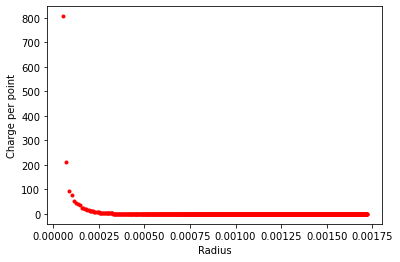

In [20]:
plt.plot(changeAtest.loc[:,"Radius (m)"],changeAtest.loc[:,"Charge per Point"],".r")
plt.ylabel("Charge per point")
plt.xlabel("Radius")


(0.0, 30.0)

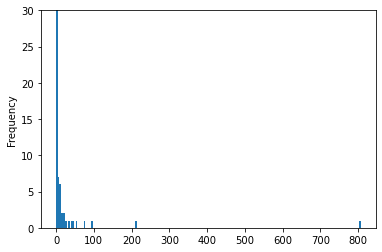

In [21]:
Charging = changeAtest.loc[:,"Charge per Point"]
Charging[Charging != 0].plot.hist(bins=200)
plt.ylim(0,30)

### setting up pad

In [22]:
pads = np.zeros((32,32))
np.set_printoptions(threshold=sys.maxsize)
pads

padxpos= np.linspace(0,31*2.2e-3,32)
padypos= np.linspace(0,31*2.2e-3,32)


In [23]:
#pad id
padid = {}
counter=0
np.set_printoptions(suppress=True)
for x in padxpos:
    for y in padypos:
        padid[counter]= [x.round(6),y.round(6)]
        counter +=1
padid

{0: [0.0, 0.0],
 1: [0.0, 0.0022],
 2: [0.0, 0.0044],
 3: [0.0, 0.0066],
 4: [0.0, 0.0088],
 5: [0.0, 0.011],
 6: [0.0, 0.0132],
 7: [0.0, 0.0154],
 8: [0.0, 0.0176],
 9: [0.0, 0.0198],
 10: [0.0, 0.022],
 11: [0.0, 0.0242],
 12: [0.0, 0.0264],
 13: [0.0, 0.0286],
 14: [0.0, 0.0308],
 15: [0.0, 0.033],
 16: [0.0, 0.0352],
 17: [0.0, 0.0374],
 18: [0.0, 0.0396],
 19: [0.0, 0.0418],
 20: [0.0, 0.044],
 21: [0.0, 0.0462],
 22: [0.0, 0.0484],
 23: [0.0, 0.0506],
 24: [0.0, 0.0528],
 25: [0.0, 0.055],
 26: [0.0, 0.0572],
 27: [0.0, 0.0594],
 28: [0.0, 0.0616],
 29: [0.0, 0.0638],
 30: [0.0, 0.066],
 31: [0.0, 0.0682],
 32: [0.0022, 0.0],
 33: [0.0022, 0.0022],
 34: [0.0022, 0.0044],
 35: [0.0022, 0.0066],
 36: [0.0022, 0.0088],
 37: [0.0022, 0.011],
 38: [0.0022, 0.0132],
 39: [0.0022, 0.0154],
 40: [0.0022, 0.0176],
 41: [0.0022, 0.0198],
 42: [0.0022, 0.022],
 43: [0.0022, 0.0242],
 44: [0.0022, 0.0264],
 45: [0.0022, 0.0286],
 46: [0.0022, 0.0308],
 47: [0.0022, 0.033],
 48: [0.0022, 0.0

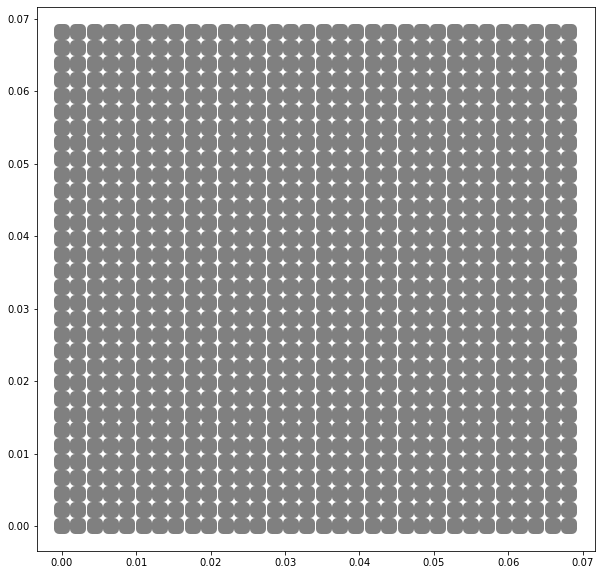

In [24]:
xval = np.array([])
yval = np.array([])
for x in padxpos:
    for y in padypos:
        xval=np.append(xval,x)
        yval=np.append(yval,y)
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")

### Placing electron and charge spread

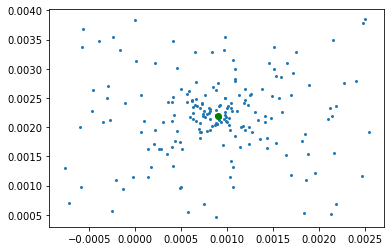

In [25]:
electronpos = np.random.uniform(0,32*2.2e-3,2)
pointpos = np.array([])

points = 200
rmax = 0.001745
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))+electronpos[0]
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))+electronpos[1]

plt.scatter(xtest,ytest,marker=".",lw=0.01)
plt.scatter(electronpos[0],electronpos[1],color="g")


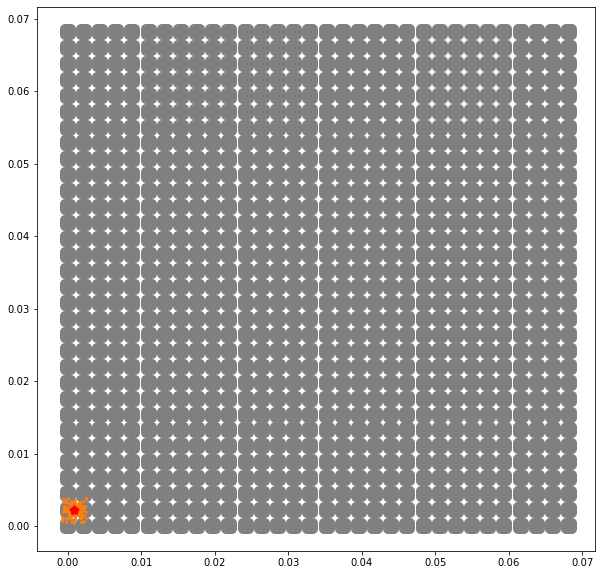

In [26]:
#put them together
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")
plt.scatter(xtest,ytest,marker=".",lw=0.01)
plt.scatter(electronpos[0],electronpos[1],color="r",marker="*",lw=4)

### putting it all together

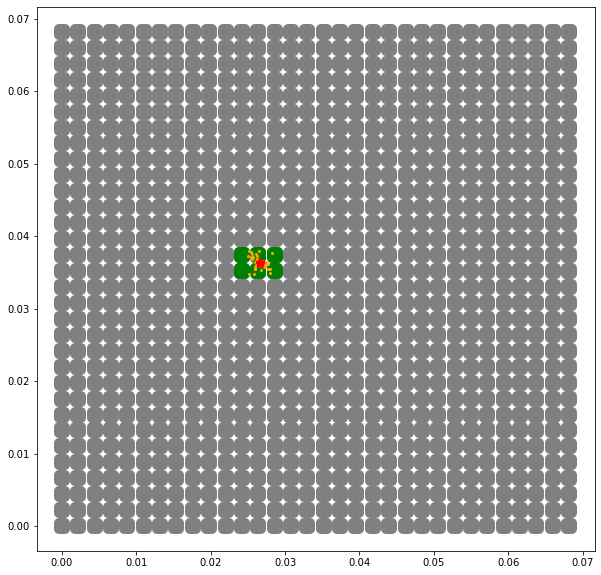

In [27]:
electronpos = np.random.uniform(rmax,32*2.2e-3-rmax,2)
pointpos = np.array([])

points = 50
rmax = 0.001745
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))+electronpos[0]
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))+electronpos[1]

filterx=np.where((xval>= np.min(xtest)-1.1e-3)&(xval<=(np.max(xtest)+1.1e-3))&(yval>= (np.min(ytest)-1.1e-3))&(yval<=np.max(ytest)+1.1e-3))
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")
plt.scatter(xval[filterx],yval[filterx],marker="s",lw=10,edgecolors="green")
plt.scatter(xtest,ytest,marker=".",lw=0.01,color="orange")
plt.scatter(electronpos[0],electronpos[1],color="r",marker="*",lw=4)

### Spreading points better.

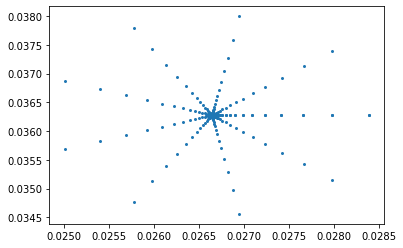

In [28]:
points = 200
rmax = 0.001745
ppa = 10 #number of points per annulie
np.random.seed(seed=2)
valuesr = np.logspace(np.log(0.00001), np.log(rmax), int(points / ppa), base=np.exp(1))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x1 = np.array([])
y1 = np.array([])
for r in valuesr:
    for theta in pirange:
        x1=np.append(x1,round(r*np.cos(theta),6)+electronpos[0])
        y1=np.append(y1,round(r*np.sin(theta),6)+electronpos[1])
plt.scatter(x1,y1,marker=".",lw=0.01)



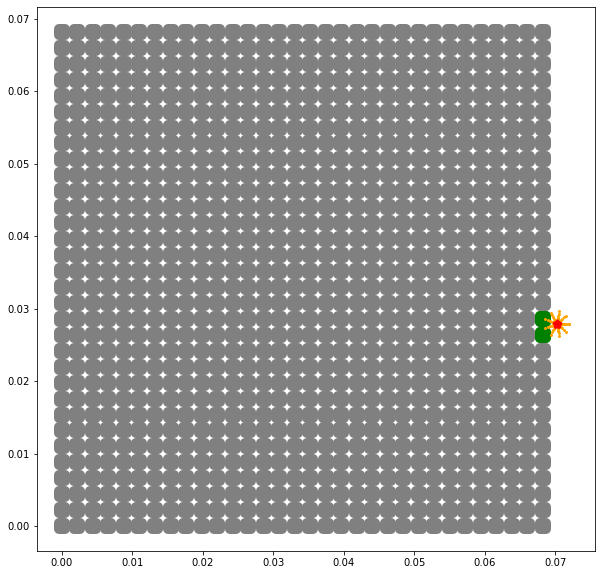

In [29]:
np.random.seed()
electronpos = np.random.uniform(0,32*2.2e-3,2)

points = 200
rmax = 0.001745
ppa = 10 #number of points per annulie
np.random.seed(seed=2)
valuesr = np.logspace(np.log(0.00001), np.log(rmax), int(points / ppa), base=np.exp(1))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x1 = np.array([])
y1 = np.array([])
for r in valuesr:
    for theta in pirange:
        x1=np.append(x1,round(r*np.cos(theta),6)+electronpos[0])
        y1=np.append(y1,round(r*np.sin(theta),6)+electronpos[1])



filterx=np.where((xval>= np.min(x1)-1.1e-3)&(xval<=(np.max(x1)+1.1e-3))&(yval>= (np.min(y1)-1.1e-3))&(yval<=np.max(y1)+1.1e-3))
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")
plt.scatter(xval[filterx],yval[filterx],marker="s",lw=10,edgecolors="green")
plt.scatter(x1,y1,marker=".",lw=0.01,color="orange")
plt.scatter(electronpos[0],electronpos[1],color="r",marker="*",lw=4)

### Grid of points

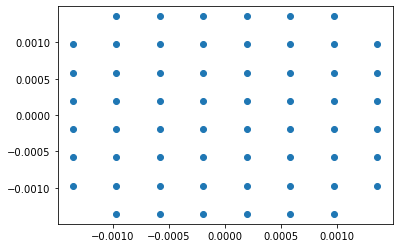

In [30]:
rmax= 0.001745
points=100
xgrid=np.linspace(-rmax,rmax,int(np.sqrt(points)))
ygrid=np.linspace(-rmax,rmax,int(np.sqrt(points)))
xg=[]
yg=[]
for x in xgrid:
    for y in ygrid:
        if x**2+y**2<rmax**2:
            xg.append(x)
            yg.append(y)
plt.scatter(xg,yg)

### Galalian point distribution

0.0
2.0943951023931953
4.1887902047863905
6.283185307179586
0.0
3.141592653589793
6.283185307179586


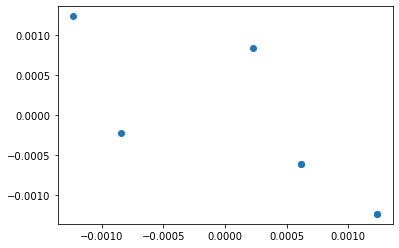

In [61]:
x= []
y = []
points=4
count=3
while points>=0:
    points=points-count
    if points>0:
        count=count+1
rangepoints = np.arange(3,count+1)
reversed_arr = rangepoints[::-1]
rrange=np.linspace(0,rmax,len(reversed_arr)+1)
rrange=np.delete(rrange,0)
for i in range(len(rrange)):
    for theta in np.linspace(0,2*np.pi,reversed_arr[i]):
        print(theta)
        x.append(rrange[i]*np.cos(theta-np.pi/4))
        y.append(rrange[i]*np.sin(theta-np.pi/4))
        
plt.scatter(x,y)

In [53]:
reversed_arr

array([8, 7, 6, 5, 4, 3])

### Finding charge per pad.

In [ ]:
"""rad= np.array([0,])
rad= np.append(rad,ChangeA.iloc[:,0])
Totcharge = ChangeA.iloc[:,1]
count = 0
cpptest = np.array([]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in rrange:
        if cur > rad[i-1] and cur< rad[i]:
            count += 1
    if count > 0:
        cpptest = np.append(cpptest,Totcharge[i-1]/count)
    else:
        cpptest = np.append(cpptest,0)
"""
